⭐️Задание со звёздочкой!⭐️

Для начала посчитаем среднее количество разных рекламных событий (показы и клики) по объявлениям. Тонкий момент - помните, что некоторые показываемые объявления не кликались, и что при группировке в таких случаях не будет строк с кликами, а для подсчёта среднего по объявлениям их нужно учитывать. Округлите ответы до целых чисел

In [54]:
import pandas as pd

In [55]:
path_ads_data = '/home/jupyter-i.tsukanov-7/shared/homeworks/python_ds_miniprojects/6/ads_data.csv'

In [56]:
ads_data = pd.read_csv(path_ads_data)
ads_data

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501
...,...,...,...,...,...,...,...,...,...,...,...
999995,2019-04-05,2019-04-05 20:59:52,view,web,112583,111818,112260,CPM,210.1,0,22392
999996,2019-04-05,2019-04-05 20:59:52,view,android,112583,111818,112260,CPM,210.1,0,22392
999997,2019-04-05,2019-04-05 20:59:52,click,web,112583,111818,112260,CPM,210.1,0,22392
999998,2019-04-05,2019-04-05 20:59:52,view,web,113350,113036,113251,CPM,183.3,0,571929


In [57]:
path_ads_clients_data = '/home/jupyter-i.tsukanov-7/shared/homeworks/python_ds_miniprojects/6/ads_clients_data.csv'

In [58]:
ads_clients_data = pd.read_csv(path_ads_clients_data)
ads_clients_data

,date,client_union_id,community_id,create_date
0,2020-05-07,1,-130371893,2018-12-24
1,2020-05-07,2,-130304626,2019-02-10
2,2020-05-07,3,-130462599,2019-01-25
3,2020-05-07,4,-130574300,2018-12-09
4,2020-05-07,5,-130292358,2019-01-08
...,...,...,...,...
122073,2020-05-07,122074,-130470790,2018-12-21
122074,2020-05-07,122075,-130911261,2018-11-09
122075,2020-05-07,122076,-130494912,2018-10-27
122076,2020-05-07,122077,-130910585,2018-12-05


In [59]:
number_ad_per_event = ads_data.groupby(['ad_id','event'], as_index = False) \
    .agg({'time':'count'}) \
    .rename(columns = {'time':'event_number'})
number_ad_per_event

,ad_id,event,event_number
0,2,click,1
1,2,view,101
2,3,click,3
3,3,view,184
4,1902,click,1
...,...,...,...
1476,122013,view,156
1477,122023,view,68
1478,122031,click,1
1479,122031,view,138


In [60]:
pivot_per_ad_events = number_ad_per_event.pivot(index = 'ad_id', columns = 'event', values = 'event_number').fillna(0)

In [61]:
pivot_per_ad_events.mean().round()

event
click    113.0
view     923.0
dtype: float64

Давайте посмотрим на распределение показов объявлений!

По оси x - число показов
По оси y - доля объявлений с такими показами

Прологарифмируйте число показов, а затем постройте такой график, чтобы можно было понять форму распределения. Выберите соответствующий график

In [62]:
import seaborn as sns

In [63]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )

In [64]:
views_per_ad = number_ad_per_event.query('event == "view"')

In [65]:
views_per_ad

,ad_id,event,event_number
1,2,view,101
3,3,view,184
5,1902,view,41
6,2064,view,35
8,2132,view,58
...,...,...,...
1475,122004,view,100
1476,122013,view,156
1477,122023,view,68
1479,122031,view,138


In [66]:
import numpy as np

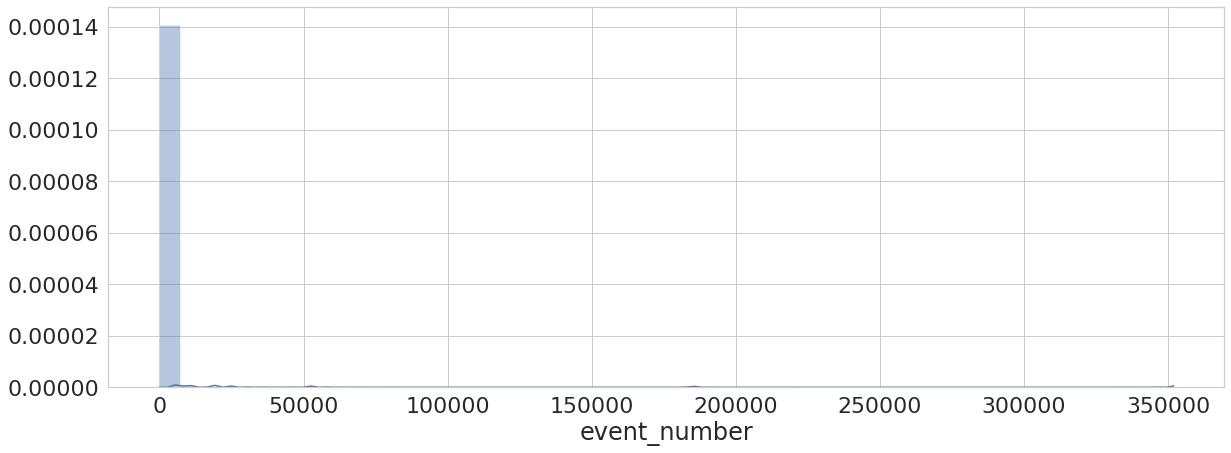

In [67]:
sns.distplot(views_per_ad.event_number)

In [68]:
views_per_ad['log_views'] = np.log(views_per_ad.event_number)

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


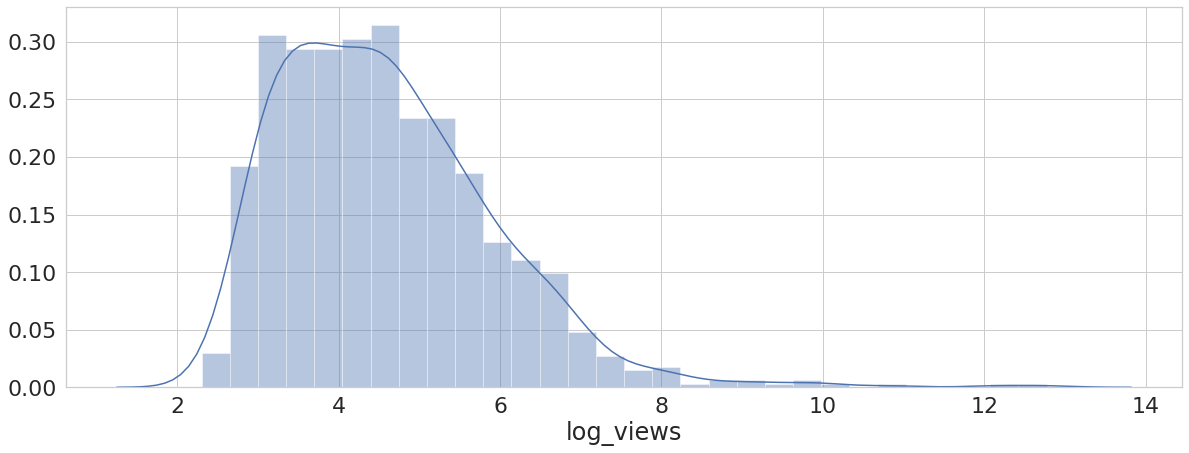

In [69]:
sns.distplot(views_per_ad.log_views)

⭐️Задание со звёздочкой!⭐️

А теперь нужно найти среднее количество показов на 1 объявление (ad_id) по дням, не учитывая объявления, у которых не было показов (обычное среднее). После этого посчитайте скользящее среднее по полученному результату с окном в 2 элемента

Какое значение скользящего среднего получим за 6 апреля 2019 года? Округлите ответ до целого числа

In [70]:
ads_view_per_date = ads_data.query('event =="view"') \
    .pivot_table(index = 'ad_id',
                columns='date',
                values = 'time',
                aggfunc = 'count')
ads_view_per_date.fillna(0)

date,2019-04-01,2019-04-02,2019-04-03,2019-04-04,2019-04-05,2019-04-06
ad_id,,,,,,
2,83.0,18.0,0.0,0.0,0.0,0.0
3,158.0,26.0,0.0,0.0,0.0,0.0
1902,0.0,0.0,34.0,7.0,0.0,0.0
2064,0.0,28.0,7.0,0.0,0.0,0.0
2132,0.0,0.0,25.0,27.0,6.0,0.0
...,...,...,...,...,...,...
122004,85.0,15.0,0.0,0.0,0.0,0.0
122013,0.0,0.0,0.0,134.0,22.0,0.0
122023,0.0,0.0,0.0,53.0,15.0,0.0


In [71]:
mean_views = ads_view_per_date.mean()

In [72]:
mean_views_rolling = ads_view_per_date.mean().rolling(2).mean()

In [73]:
mean_views_rolling['2019-04-06'].round()

598.0

⭐️Задание со звёздочкой!⭐️

Скользящее среднее часто используется для поиска аномалий в данных. Давайте попробуем нанести на один график значения просто среднего количества показов по дням и скользящего среднего на основе этих данных (которое мы получили в прошлом задании).

Посчитайте, в какой день наблюдается наибольшая разница по модулю между арифметическим средним и скользящим средним? Дни, в которых скользящее среднее равно NaN, не учитываем. Запишите ответ в формате yyyy-MM-dd

Пример ответа

2020-12-31

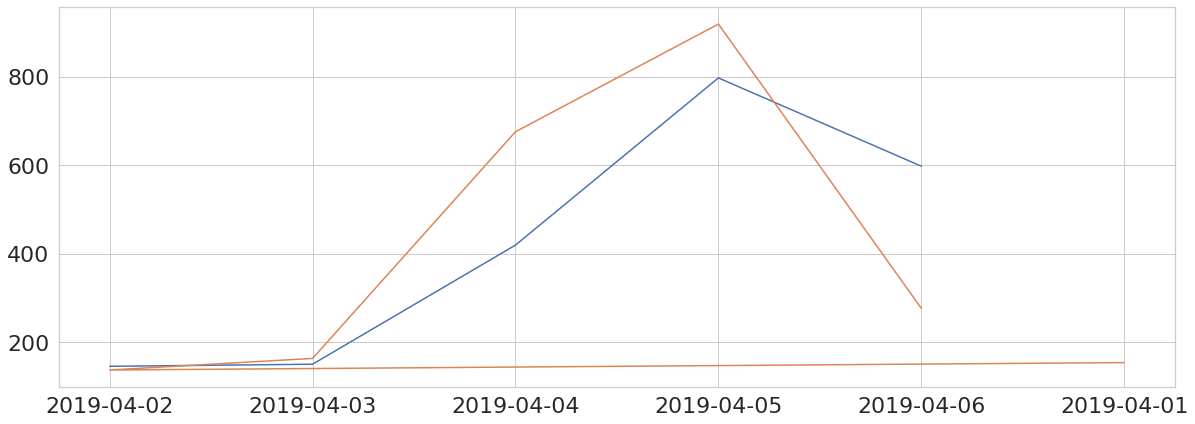

In [74]:
sns.lineplot(data = mean_views_rolling)
sns.lineplot(data = mean_views)

In [75]:
(mean_views - mean_views_rolling).abs().idxmax()

'2019-04-06'

⭐️Задание со звёздочкой!⭐️

Ну а теперь найдём проблемное объявление (с наибольшим/наименьшим количеством показов) в день, в который была замечена самая большая по модулю аномалия. То есть нужно переиспользовать предыдущий датафрэйм и найти среди данных рекламы в тот день объявление с наибольшим или наименьшим числом показов.
Потом напишите функцию, которая будет искать такое объявление в датасэте

В ответе укажите id проблемного объявления в день, полученный на предыдущем шаге

In [76]:
ads_view_per_date['2019-04-06']

ad_id
2          NaN
3          NaN
1902       NaN
2064       NaN
2132       NaN
          ... 
122004     NaN
122013     NaN
122023     NaN
122031    19.0
122078     NaN
Name: 2019-04-06, Length: 956, dtype: float64

In [77]:
# Находим дату с аномалией 
anomaly_date = (mean_views - mean_views_rolling).abs().idxmax()

In [78]:
(mean_views - mean_views_rolling)[anomaly_date]

-320.9934750733138

In [79]:
difference_value = (mean_views - mean_views_rolling)[anomaly_date]
if difference_value <= 0:
    anomaly_ad = ads_view_per_date[anomaly_date].idxmax()
else:
    anomaly_ad = ads_view_per_date[anomaly_date].idxmin()
anomaly_ad

112583

In [80]:
# Написание функции
def find_anomaly_id(ad_view_per_add):
    # среднее по рекламам
    mean_views = ad_view_per_add.mean()
    # находим аномальный день
    anomaly_date = (mean_views - mean_views_rolling).abs().idxmax()
    # находим знак 
    difference_value = (mean_views - mean_views_rolling)[anomaly_date]
    # находим id при максимуме
    if difference_value <= 0:
        anomaly_ad = ad_view_per_add[anomaly_date].idxmax()
    # находим id при минимуме
    else:
        anomaly_ad = ad_view_per_add[anomaly_date].idxmin()
    return anomaly_ad

In [81]:
find_anomaly_id(ads_view_per_date)

112583

Теперь объедините данные рекламы с данными о рекламных клиентах и найдите среднее количество дней от даты создания рекламного клиента (create_date) и первым запуском рекламного объявления этим клиентом (date)

В качестве ответа укажите среднее число дней

In [82]:
full_data = ads_data.merge(ads_clients_data.drop(columns=['date', 'community_id']))
full_data.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,create_date
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04
1,2019-04-01,2019-04-01 00:03:28,view,android,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04
2,2019-04-01,2019-04-01 00:04:58,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04
3,2019-04-01,2019-04-01 00:10:23,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04
4,2019-04-01,2019-04-01 00:15:42,view,android,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04


In [83]:
full_data[['date', 'create_date']] = full_data[['date', 'create_date']].apply(pd.to_datetime)

In [85]:
full_data.groupby('client_union_id') \
    .apply(lambda group: (group.date - group.create_date).min()) \
    .mean()

Timedelta('124 days 09:04:43.532219570')

💀 Сложное задание! 💀

Давайте вычислим конверсию из создания рекламного кабинета в запуск первой рекламы в течение не более 365 дней.

Конверсия – отношение числа клиентов, которые совершили целевое действие (создали рекламу), к общему числу клиентов. Например, 1000 клиентов создали кабинет, но лишь 50 из них запустили рекламу. В таком случае конверсия будет равна \frac {50} {1000} \cdot 100 = 5 
1000
50
​	
 ⋅100=5%

Чтобы отобрать данные за нужный промежуток, можно воспользоваться сравнением времени до создания первой рекламы с pd.Timedelta(365, unit='day'))

Ответ дайте в процентах и округлите до сотых
Пример ответа

34.69

In [87]:
threshold = pd.to_timedelta(365, unit = 'd')
threshold

Timedelta('365 days 00:00:00')

In [89]:
difference_time = full_data.groupby('client_union_id') \
    .apply(lambda group: (group.date - group.create_date).min())
difference_time

client_union_id
1         98 days
9        114 days
13        66 days
16       105 days
20        32 days
           ...   
122004    67 days
122013   151 days
122023   126 days
122031    96 days
122078    71 days
Length: 838, dtype: timedelta64[ns]

In [92]:
difference_time = difference_time.loc[difference_time < threshold]
difference_time

client_union_id
1         98 days
9        114 days
13        66 days
16       105 days
20        32 days
           ...   
122004    67 days
122013   151 days
122023   126 days
122031    96 days
122078    71 days
Length: 838, dtype: timedelta64[ns]

In [97]:
round(difference_time.shape[0]/ads_clients_data.client_union_id.nunique()*100,2)

0.69

Давайте разобъем наших клиентов по промежуткам от создания рекламного кабинета до запуска первого рекламного объявления

Определите, сколько уникальных клиентов запустили свое первое объявление в первый месяц своего существования (от 0 до 30 дней). Список промежутков дней для метода pd.cut() – [0, 30, 90, 180, 365]

Создать временные промежутки можно с помощью pd.to_timedelta()

In [100]:
bins = pd.to_timedelta([0,30,90,180,365], unit = 'd')
bins

TimedeltaIndex(['0 days', '30 days', '90 days', '180 days', '365 days'], dtype='timedelta64[ns]', freq=None)

In [127]:
cut_bins = pd.cut(difference_time, 
       bins = bins, labels = ['0-30','30-90', '90-180', '180-365'])

In [135]:
cut_bins.value_counts()

90-180     396
30-90      263
180-365    168
0-30        11
dtype: int64

Ну и на закуску - постройте интерактивный барплот, на котором будет видно категории с количеством уникальных клиентов в них. Расположите их так, чтобы внизу была самая малочисленная, а наверху - самая большая

In [125]:
import plotly.express as px

In [136]:
px.bar(cut_bins.value_counts())

Дополнительный проект
Сегодня у нас особенный минипроект - особенный с 2-ух точек зрения. Во-первых, мы будем работать со строковыми данными, и тут вам может понадобится часть конспекта этого урока, посвящённая строковым методам серий. Во-вторых, это нетипичные данные аналитика - это gff файл, описывающий геном мухи.  Описание формата можно найти здесь

Этот проект дан, чтобы разобрать работу с текстом, а также потому что ваши коллеги, узнав, что вы стали датасаентистом, могут просить вас распарсить разные файлы и достать из них нужную информацию. Формат фалов может быть различным - зависит от занятия ваших коллег) Если вы не понимаете, что вообще происходит в этом файле - ничего страшного, задача состоит в парсинге)

In [140]:
bio_df = pd.read_csv('https://stepik.org/media/attachments/course/72204/gff.tsv', sep = '\t')
bio_df.head()

,seq_id,source,type,start,end,score,strand,phase,attributes
0,chr17,RefSeq,exon,6811330,6811453,.,+,.,Parent=XM_001475631.1
1,chr17,RefSeq,CDS,6808204,6808245,.,+,0,Name=CDS:NC_000083.5:LOC100040603;Parent=XM_00...
2,chr17,RefSeq,CDS,6811792,6811869,.,+,2,Name=CDS:NC_000083.5:LOC100040603;Parent=XM_00...
3,chr17,RefSeq,exon,6806513,6806553,.,+,.,Parent=XM_001475631.1
4,chr17,RefSeq,five_prime_UTR,6806513,6806526,.,+,.,Parent=XM_001475631.1


In [150]:
parent = bio_df.attributes.str.extract(r'Parent=(?P<Parent>[\w\.]+)')
# r - используется для описания паттерна
# Parent= означает, что эта часть обязательна для поиска
# в скобках указываем сам искомый паттерн
# \. - будет искать точку, а не как единичный символ
# в [] указываем либо буква либо цифра любое кол-во раз
# ?P<название колонки> так описывается название колонки 
# по умолчанию колонка называется 0, т.к. в данном случае, есть только
# одна группа - ()
parent.Parent.value_counts()

XM_001475631.1    479
NC_000083.5        33
Name: Parent, dtype: int64

Какое самое частое значение в колонке type?



In [152]:
bio_df.type.value_counts().idxmax()

'exon'